[View in Colaboratory](https://colab.research.google.com/github/fickas/mccain/blob/master/reuters.ipynb)

NOTE COULD BE ALSO USED WITH SPOOKY (3 classes)

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)


8982

In [3]:
len(test_data)

2246

In [4]:
#convert from int rep back to english

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])


557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
'''
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
'''

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [0]:
#using 64 layers because larger output space

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 249us/step - loss: 2.5314 - acc: 0.4950 - val_loss: 1.7243 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 159us/step - loss: 1.4491 - acc: 0.6872 - val_loss: 1.3500 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.1001 - acc: 0.7637 - val_loss: 1.1746 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.8730 - acc: 0.8145 - val_loss: 1.0805 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.7060 - acc: 0.8478 - val_loss: 0.9860 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5694 - acc: 0.8797 - val_loss: 0.9411 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.4621 - acc: 0.9024 - val_loss: 0.9089 - val_acc: 0.8010


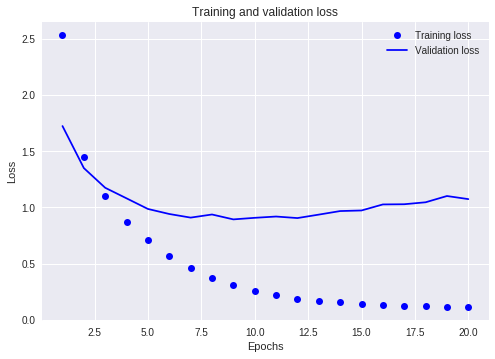

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

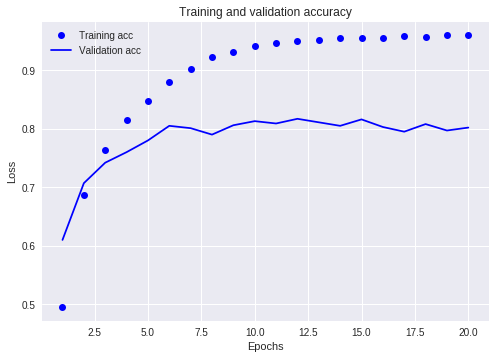

In [12]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


TRY WITH ONLY 9 EPOCHS

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 185us/step - loss: 2.6146 - acc: 0.4629 - val_loss: 1.7337 - val_acc: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 163us/step - loss: 1.4106 - acc: 0.7071 - val_loss: 1.2782 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 158us/step - loss: 1.0452 - acc: 0.7785 - val_loss: 1.1047 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.8189 - acc: 0.8311 - val_loss: 1.0273 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.6511 - acc: 0.8631 - val_loss: 0.9533 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.5299 - acc: 0.8905 - val_loss: 0.9212 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.4214 - acc: 0.9112 - val_loss: 0.9029 - val_acc: 0.8130
Epoch 8

In [16]:
results

[0.9825872317659781, 0.786731967996086]

In [17]:
predictions = model.predict(x_test)

predictions[0] #probs for first sample - choose highest prob

array([9.3059774e-05, 4.6292622e-05, 8.9517371e-06, 8.8602346e-01,
       7.2327591e-02, 3.5667499e-06, 5.1805640e-05, 4.4060773e-05,
       3.2801084e-02, 1.1277084e-04, 2.0543020e-04, 7.1632408e-04,
       1.8850526e-04, 9.2051842e-04, 2.8858459e-04, 1.4397030e-04,
       2.6968881e-04, 1.6199061e-04, 1.6510678e-05, 1.1648440e-03,
       8.8625116e-04, 3.6724596e-04, 1.3905002e-05, 6.4119296e-05,
       1.4720291e-05, 1.4983740e-04, 4.5663979e-05, 3.0066069e-05,
       4.0630308e-05, 6.2663072e-05, 8.2125975e-05, 5.3255859e-05,
       3.6132053e-04, 3.3016472e-06, 2.4898956e-04, 1.9880599e-06,
       1.2853342e-03, 2.4449721e-05, 1.9752959e-04, 2.9605432e-04,
       5.7219830e-05, 9.3154822e-06, 5.5827181e-06, 7.6447104e-05,
       2.9720011e-05, 3.2422463e-06], dtype=float32)